In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import time
import itertools
# Classifier Libraries

from sklearn.metrics import confusion_matrix


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('../input/creditcardfraud/creditcard.csv')
df.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [38]:
#describe df
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Important notes, when dealing with imbalanced data set ( anomaly detection) use f1-score not accuracy score 



In [39]:
#check for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

no null values ! lucky

In [40]:
#feature columns 

df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [41]:
def plot_confusion_matrix(cm, title, classes=['abnormal', 'normal'],
                          cmap=plt.cm.Blues, save=False, saveas="MyFigure.png"):
    
    # print Confusion matrix with blue gradient colours
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.1%'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if save:
        plt.savefig(saveas, dpi=100)

In [42]:
#lets see how the data is distributed 

print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '%')

Frauds 0.17 %


therefore 99.83% of the dataset is not fraud. Our data is heavily imbalanced. Using an accuracy metric to predict our values would be flawed as if our model simply classified every data = 0/not fraud this would result to a 99.83% accuracy in our traning set and even validation set but would be particulary useful in the real world 

Text(0.5, 1.0, 'Distribution of Fraud = 1 and genuine = 0')

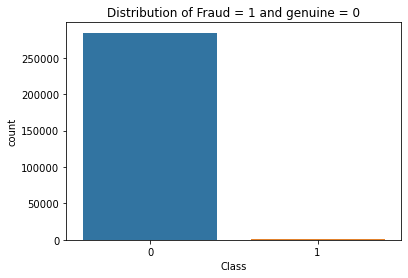

In [43]:
#vizualize the data 
 
sns.countplot('Class', data=df)
plt.title ('Distribution of Fraud = 1 and genuine = 0')

(0.0, 172792.0)

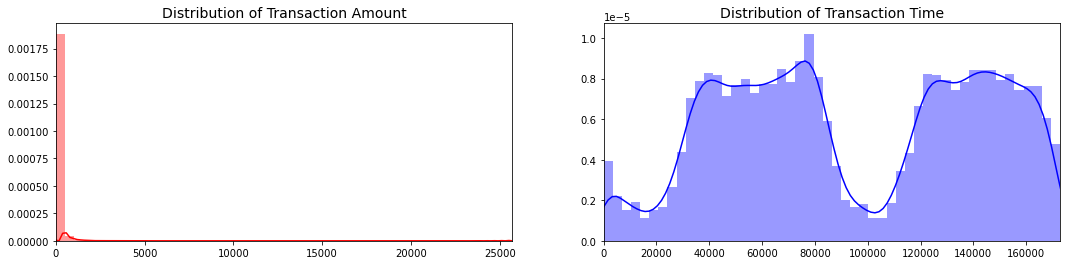

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])


Now before we continue, I see alot of people using undersampling and over sampling combined with some form of classifier to identify fraud detection. While one can argue this is a good approach, a new approach is using isolation forest

Explanation of isolation forest...

Isolation Forest does not require us to normalize the data 

In [46]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report
num_outliers = len(df[df['Class']==1])
num_inliers = len(df[df['Class']==0])
outlier_percent= num_outliers/float(num_inliers)
X = df.loc[:, df.columns!='Class']
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=0)

clf = IsolationForest(n_estimators=100, max_samples=0.25,
                      contamination=outlier_percent, random_state=0)

clf.fit(X_train,y_train)
y_pred_train = clf.predict(X_train)

In [47]:
scores_prediction = clf.decision_function(X)
y_pred_train = clf.predict(X_train)
y_pred_train[y_pred_train == 1] = 0
y_pred_train[y_pred_train == -1] = 1
n_errors = (y_pred_train != y_train).sum()

In [48]:
print("{}: {}".format("No. of Anomalous Points with Isolation Forest ",n_errors))
print("Accuracy Score :",accuracy_score(y_train,y_pred_train))
print("Classification Report :")
print(classification_report(y_train,y_pred_train))

No. of Anomalous Points with Isolation Forest : 467
Accuracy Score : 0.9975526674352794
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    190490
           1       0.29      0.29      0.29       330

    accuracy                           1.00    190820
   macro avg       0.65      0.65      0.65    190820
weighted avg       1.00      1.00      1.00    190820



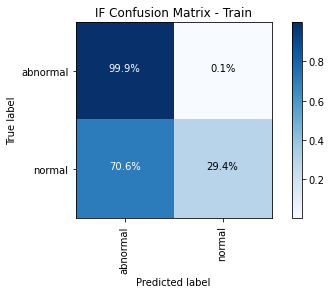

In [49]:
cm = confusion_matrix(y_train, y_pred_train)
plot_confusion_matrix(cm, title="IF Confusion Matrix - Train", save=True)

We will now evaluate it on our test set 

In [50]:
clf = IsolationForest(n_estimators=100, max_samples=0.25,
                      contamination=outlier_percent, random_state=0)

clf.fit(X_train,y_train)
y_pred_test = clf.predict(X_test)

In [51]:
scores_prediction = clf.decision_function(X)
y_pred_test = clf.predict(X_test)
y_pred_test[y_pred_test == 1] = 0
y_pred_test[y_pred_test == -1] = 1
n_errors = (y_pred_test != y_test).sum()

In [52]:
print("{}: {}".format("No. of Anomalous Points with Isolation Forest ",n_errors))
print("Accuracy Score :",accuracy_score(y_test,y_pred_test))
print("Classification Report :")
print(classification_report(y_test,y_pred_test))

No. of Anomalous Points with Isolation Forest : 239
Accuracy Score : 0.9974570951301776
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.27      0.28      0.27       162

    accuracy                           1.00     93987
   macro avg       0.63      0.64      0.64     93987
weighted avg       1.00      1.00      1.00     93987



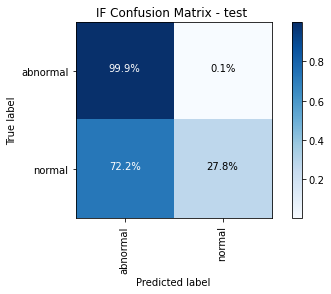

In [53]:
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm, title="IF Confusion Matrix - test ", save=True)